In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections
import copy

In [5]:
data = pd.read_csv("Charisma_November 28, 2023_20.03.csv")
demographics = pd.read_csv("prolific_export_65669403569a039c1a638bac.csv")

In [32]:
demographics_real = demographics.loc[demographics["Status"] == "AWAITING REVIEW"]

In [33]:
demographics_real

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,6566992b285114bb27fe564c,5589a309fdf99b7ae5007c33,AWAITING REVIEW,2023-11-29T01:51:45.432000Z,2023-11-29T01:53:35.183000Z,NaN,2023-11-29T01:53:35.634792Z,110.0,CU04BQOF,1119,46,Male,White,United States,United States,United States,English,No,Full-Time
1,6566997bc53734f641fe9796,6519add4907624469d5f1635,AWAITING REVIEW,2023-11-29T01:53:04.259000Z,2023-11-29T01:58:16.371000Z,NaN,2023-11-29T01:58:16.806772Z,313.0,CU04BQOF,242,20,Male,Black,United States,United States,United States,English,No,Unemployed (and job seeking)
2,6566998b58ca02d8320d811f,5bbe58e22b131d000183c317,AWAITING REVIEW,2023-11-29T01:53:18.045000Z,2023-11-29T01:55:42.292000Z,NaN,2023-11-29T01:55:42.781077Z,145.0,CU04BQOF,1,DATA_EXPIRED,Male,DATA_EXPIRED,United States,United States,United States,English,No,DATA_EXPIRED
3,65669a0d814efa386b217c49,63d9e6b07d98353f362f023f,AWAITING REVIEW,2023-11-29T01:55:31.264000Z,2023-11-29T01:58:38.844000Z,NaN,2023-11-29T01:58:39.429162Z,188.0,CU04BQOF,23,35,Male,White,United States,United States,United States,English,No,DATA_EXPIRED
4,65669a9458ca02d8320d8149,63fad8b20e532757a496f7f5,AWAITING REVIEW,2023-11-29T01:57:42.948000Z,2023-11-29T02:00:05.781000Z,NaN,2023-11-29T02:00:06.577273Z,143.0,CU04BQOF,1654,54,Male,Asian,United States,United States,United States,English,No,DATA_EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6566a2696604d6d4dd457282,54af2a48fdf99b09c01b3801,AWAITING REVIEW,2023-11-29T02:31:08.039000Z,2023-11-29T02:33:15.617000Z,NaN,2023-11-29T02:33:16.073102Z,128.0,CU04BQOF,4420,27,Female,Asian,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
176,6566a275e08eff75563c10cb,6103a6a5b1d93e18d85a6f23,AWAITING REVIEW,2023-11-29T02:31:22.402000Z,2023-11-29T02:33:07.167000Z,NaN,2023-11-29T02:33:07.754611Z,105.0,CU04BQOF,1857,23,Female,Mixed,United States,United States,United States,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
177,6566a28e74acc672e1debb0d,5654171504212700054a12ad,AWAITING REVIEW,2023-11-29T02:32:23.256000Z,2023-11-29T02:34:35.931000Z,NaN,2023-11-29T02:34:36.435423Z,133.0,CU04BQOF,960,41,Female,Black,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
178,6566a41b4244f2fafa50d4de,61267e282a445af9eb95beae,AWAITING REVIEW,2023-11-29T02:38:35.725000Z,2023-11-29T02:41:24.694000Z,NaN,2023-11-29T02:41:25.204158Z,169.0,CU04BQOF,1257,36,Female,White,United States,United States,United States,English,No,"Not in paid work (e.g. homemaker', 'retired or..."


In [35]:
results = data.loc[:, ["Q1", "Hunt Choice", "Weakest Link Choice"]].set_index("Q1")

In [44]:
total_results = results.join(demographics_real.set_index("Participant id"), how = "inner")
total_results.head()

,Hunt Choice,Weakest Link Choice,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
65649536de378d6c36a6266b,Hunt stag,4,656697704bda2d0bb8696d6d,AWAITING REVIEW,2023-11-29T01:44:22.427000Z,2023-11-29T01:48:19.642000Z,NaN,2023-11-29T01:48:20.096516Z,238.0,CU04BQOF,2,36,Female,Black,United States,United States,United States,English,No,Full-Time
57a8abb3dcff7d0001c7d5a3,Hunt stag,7,656697aaa8c58b2ef7def9b3,AWAITING REVIEW,2023-11-29T01:45:18.151000Z,2023-11-29T01:48:45.531000Z,NaN,2023-11-29T01:48:46.014114Z,208.0,CU04BQOF,544,29,Female,White,United States,United States,United States,English,No,DATA_EXPIRED
5589a309fdf99b7ae5007c33,Hunt stag,7,6566992b285114bb27fe564c,AWAITING REVIEW,2023-11-29T01:51:45.432000Z,2023-11-29T01:53:35.183000Z,NaN,2023-11-29T01:53:35.634792Z,110.0,CU04BQOF,1119,46,Male,White,United States,United States,United States,English,No,Full-Time
5bb9f9dad5330e000101a241,Hunt hare,1,65669934ea15de5f69b6dea1,AWAITING REVIEW,2023-11-29T01:51:50.788000Z,2023-11-29T01:54:42.329000Z,NaN,2023-11-29T01:54:42.824056Z,172.0,CU04BQOF,868,33,Female,Asian,United States,United States,United States,English,No,Full-Time
5bbe58e22b131d000183c317,Hunt stag,1,6566998b58ca02d8320d811f,AWAITING REVIEW,2023-11-29T01:53:18.045000Z,2023-11-29T01:55:42.292000Z,NaN,2023-11-29T01:55:42.781077Z,145.0,CU04BQOF,1,DATA_EXPIRED,Male,DATA_EXPIRED,United States,United States,United States,English,No,DATA_EXPIRED


In [45]:
random_table = total_results.sample(frac=1)

In [61]:
hunt_breakdown = collections.Counter(random_table["Hunt Choice"])
weakest_link_breakdown = collections.Counter(random_table["Weakest Link Choice"])

myKeys = list(weakest_link_breakdown.keys())
myKeys.sort()
weakest_link_breakdown = {i: weakest_link_breakdown[i] for i in myKeys}

<BarContainer object of 2 artists>

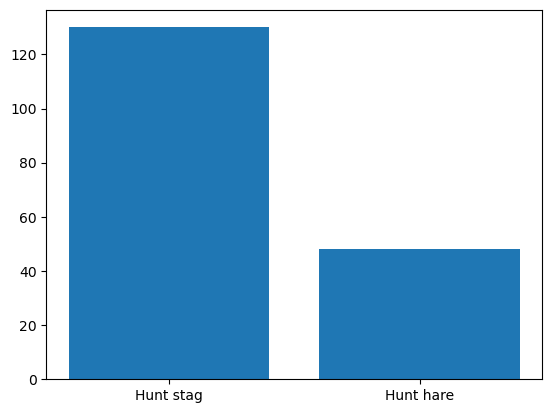

In [63]:
plt.bar(hunt_breakdown.keys(), hunt_breakdown.values())

<BarContainer object of 7 artists>

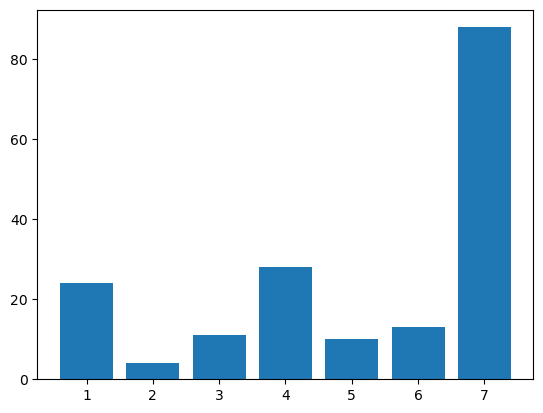

In [64]:
plt.bar(weakest_link_breakdown.keys(), weakest_link_breakdown.values())

In [178]:
weakest_link_players = random_table#random_table.iloc[0:90]
stag_hunt_players = random_table#random_table.iloc[90:len(random_table)]

In [179]:
def stag_hunt_game(player1, player2):
    if(player1 == player2):
        if(player1 == "Hunt stag"):
            return [1,1]
        elif(player1 == "Hunt hare"):
            return [0.8,0.8]
    else:
        if(player1 == "Hunt hare"):
            return [0.8, 0]
        elif(player2 == "Hunt hare"):
            return [0, 0.8]
    print(player1, player2)

In [180]:
s_id_list = []
s_choice_list = []
s_payoffs_list = []

for i in range(int(len(stag_hunt_players) / 2)):
    s_id_list.extend(list(stag_hunt_players.iloc[2 * i: 2 * i + 2].index))
    choices = list(stag_hunt_players.iloc[2 * i: 2 * i + 2]["Hunt Choice"])
    s_choice_list.extend(choices)
    payoffs = stag_hunt_game(choices[0], choices[1])
    s_payoffs_list.extend(payoffs)

In [181]:
weakest_link_dict = {1: {1: 0.7, 2: 0.6, 3: 0.5, 4: 0.4, 5: 0.3, 6: 0.2, 7: 0.1},
                     2: {2: 0.8, 3: 0.7, 4: 0.6, 5: 0.5, 6: 0.4, 7: 0.3},
                     3: {3: 0.9, 4: 0.8, 5: 0.7, 6: 0.6, 7: 0.5},
                     4: {4: 1.0, 5: 0.9, 6: 0.8, 7: 0.7},
                     5: {5: 1.1, 6: 1.0, 7: 0.9},
                     6: {6: 1.2, 7: 1.1},
                     7: {7: 1.3}}

def weakest_link_game(players):
    min_selection = np.min(players)
    dict_to_use = weakest_link_dict[min_selection]
    payoffs = []
    for i in players:
        payoffs.append(dict_to_use[i])
    return payoffs

In [182]:
w_id_list = []
w_choice_list = []
w_payoffs_list = []

n_players = 5
for i in range(int(len(weakest_link_players) / n_players)):
    w_id_list.extend(list(weakest_link_players.iloc[n_players * i: n_players * i + n_players].index))
    choices = list(np.asarray(weakest_link_players.iloc[n_players * i: n_players * i + n_players]["Weakest Link Choice"]).astype(int))
    w_choice_list.extend(choices)
    payoffs = weakest_link_game(choices)
    w_payoffs_list.extend(payoffs)

In [183]:
w_payoffs_dict = {1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
w_payoffs_mean = {}
for i in range(len(w_choice_list)):
    w_payoffs_dict[w_choice_list[i]].append(w_payoffs_list[i])
for i in w_payoffs_dict.keys():
    w_payoffs_mean[i] = np.mean(w_payoffs_dict[i])

In [184]:
id_list = copy.deepcopy(s_id_list)
id_list.extend(w_id_list)

payoffs_list = copy.deepcopy(s_payoffs_list)
payoffs_list.extend(w_payoffs_list)

In [185]:
payoff_csv = pd.DataFrame({"ID": id_list, "Payoff": payoffs_list})

In [186]:
non_zero_payoff_csv = payoff_csv.loc[payoff_csv["Payoff"] != 0]

In [187]:
non_zero_payoff_csv.to_csv("payoff.csv", index=False)

In [188]:
np.sum(payoffs_list)

225.29999999999995

In [189]:
approve_id = pd.DataFrame({"ID": id_list})
approve_id.to_csv("approve_id.csv", index=False)

In [190]:
zero_payoff_csv = payoff_csv.loc[payoff_csv["Payoff"] == 0]

In [191]:
zero_payoff_csv.to_csv("zero_payoff_mesage.csv", index=False)

In [192]:
pd.DataFrame({"Choice": s_choice_list, "Payoff": s_payoffs_list}).to_csv("s_choice_payoff.csv", index = False)
pd.DataFrame({"Choice": w_choice_list, "Payoff": w_payoffs_list}).to_csv("w_choice_payoff.csv", index = False)